In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [2]:
movies = pd.read_csv('ml-latest-small/movies.csv')
rating= pd.read_csv('ml-latest-small/ratings.csv')

In [3]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [5]:
rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [6]:
rating.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [7]:
print(rating.nunique(axis=0))

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64


array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

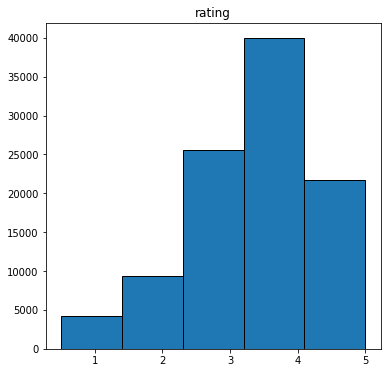

In [8]:
rating['rating'].describe(include='all')
rating.groupby('rating')['movieId'].nunique()
rating.hist(column='rating', figsize=(6,6), bins=5, grid=False, edgecolor='black')

In [14]:
sparse = rating.pivot(index='movieId',columns='userId',values='rating')
sparse.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
sparse.fillna(0,inplace=True)
sparse

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
no_user_voted = rating.groupby('movieId')['rating'].agg('count')
no_movies_voted = rating.groupby('userId')['rating'].agg('count')

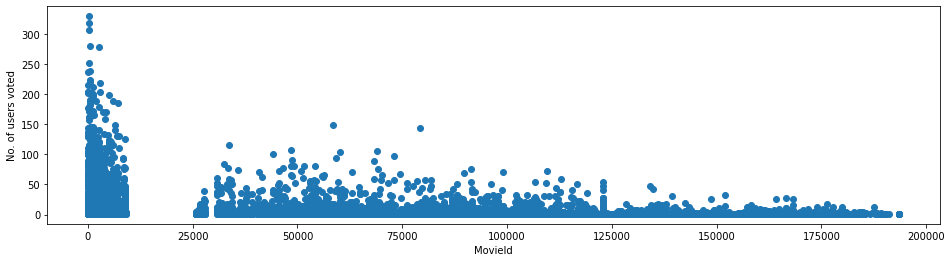

In [12]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_user_voted.index,no_user_voted)
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

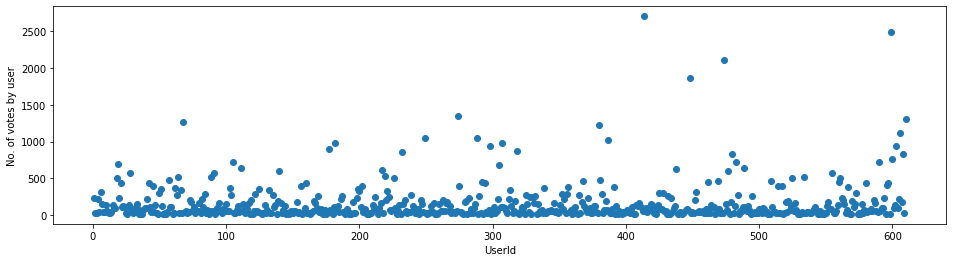

In [13]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted)
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

KNN

final_dataset is converted to sparse matrix for Knn model. As you can see, size of matrix is decreased.
9724x610 to 100836x3

In [16]:
csr_data = csr_matrix(sparse.values)
sparse.reset_index(inplace=True)
csr_data

<9724x610 sparse matrix of type '<class 'numpy.float64'>'
	with 100836 stored elements in Compressed Sparse Row format>

First of all, I used cosine metric.

In [17]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

Here, I used euclidean metric.

In [18]:
knn2 = NearestNeighbors(metric='euclidean', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn2.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='euclidean', n_jobs=-1,
                 n_neighbors=20)

Finally using this function, I get recommended movies.

In [19]:
def get_movie_recommendation(movie_name,model):
    n_movies_to_reccomend = 11
    movie_list = movies[movies['title'].str.contains(movie_name)] 
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = sparse[sparse['movieId'] == movie_idx].index[0]
        distances , indices = model.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend)
        combination=zip(distances.flatten(),indices.flatten()) 
        recommend_frame = []
        for i,j in combination:
            movie_idx = sparse.iloc[j]['movieId']
            movieName=movies[movies['movieId']==movie_idx]['title'].values[0]
            if model==knn2:
                recommend_frame.append({'Title':movieName,'Distance':i})
            else:
                recommend_frame.append({'Title':movieName,'Distance':i,'Similarity':1-i})
        df = pd.DataFrame(recommend_frame,index=range(0,n_movies_to_reccomend))
        return df
    else:
        return "No movies found. Please check your input"

This is result of Knn-cosine similarity. Distance of Iron Man is 0 and similarity is 100%. 

Distance of The Dark Knight is 0.32 and similarity is 1-0.32=0.67. Actually, 67%.

Other movies sorted by distance minimum to maximum.

In [20]:
get_movie_recommendation('Iron Man',knn)

,Title,Distance,Similarity
0,Iron Man (2008),0.000000,1.000000
1,"Dark Knight, The (2008)",0.329462,0.670538
2,WALL·E (2008),0.332225,0.667775
3,"Avengers, The (2012)",0.341324,0.658676
4,Iron Man 2 (2010),0.358014,0.641986
5,Avatar (2009),0.375732,0.624268
6,Batman Begins (2005),0.402929,0.597071
7,Up (2009),0.403264,0.596736
8,Thor (2011),0.410508,0.589492
9,Guardians of the Galaxy (2014),0.411029,0.588971


This is result of Knn-euclidean metric. As you can see, movies sorted by distance.

In [21]:
get_movie_recommendation('Iron Man',knn2)

,Title,Distance
0,Iron Man (2008),0.000000
1,Iron Man 2 (2010),29.098969
2,"Avengers, The (2012)",29.702693
3,Thor (2011),30.683872
4,Iron Man 3 (2013),31.300958
5,Watchmen (2009),31.527766
6,X-Men: First Class (2011),31.610916
7,Kung Fu Panda (2008),31.697792
8,Star Trek (2009),31.925695
9,Pirates of the Caribbean: At World's End (2007),32.015621


This function does title clean. Because I will do live search box.

In [22]:
import re

def clean_title(title):
    return re.sub("[^a-zA-Z0-9 ]","",title)

Here I applied this function.

In [23]:
movies["clean_title"]=movies["title"].apply(clean_title)

In [24]:
movies

,movieId,title,genres,clean_title
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji 1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men 1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale 1995
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II 1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,Black Butler Book of the Atlantic 2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,No Game No Life Zero 2017
9739,193585,Flint (2017),Drama,Flint 2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,Bungo Stray Dogs Dead Apple 2018


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
vectorizer=TfidfVectorizer(ngram_range=(1,2))
tfidf=vectorizer.fit_transform(movies["clean_title"])

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

def search(title):
    title=clean_title(title)
    query_vec=vectorizer.transform([title])
    similarity=cosine_similarity(query_vec,tfidf).flatten()
    indices=np.argpartition(similarity,-5)[-5:]
    results=movies.loc[indices][::-1]
    return results

In [31]:
import ipywidgets as widgets
from IPython.display import display

Live Search Box

In [32]:
movie_input=widgets.Text(value="",description="Movie title:",disabled=False)
movie_list=widgets.Output()

def on_type(data):
    with movie_list:
        movie_list.clear_output()
        title=data["new"]
        if len(title)>5:
            display(search(title))

movie_input.observe(on_type,names='value')
display(movie_input,movie_list)

Text(value='', description='Movie title:')

Output()

In [33]:
rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Recommended System Without Model

1 is movie id for Toy Story.

I found users who rated 4 or higher for Toy Story movie.

In [34]:
similar_users=rating[(rating["movieId"]==1) & (rating["rating"]>=4)]
similar_users

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1667,17,1,4.5,1305696483
2274,19,1,4.0,965705637
...,...,...,...,...
95864,601,1,4.0,1521467801
96100,603,1,4.0,963178147
97143,605,1,4.0,1277097561
98479,607,1,4.0,964744033


The list of userId who watched Toy Story.

In [35]:
similar_users=similar_users["userId"].unique()
similar_users

array([  1,   5,   7,  17,  19,  31,  40,  43,  45,  46,  57,  63,  64,
        66,  71,  73,  78,  86,  91,  96,  98, 103, 107, 121, 124, 135,
       137, 141, 145, 151, 156, 159, 160, 161, 166, 169, 171, 177, 178,
       179, 182, 185, 186, 191, 201, 202, 206, 217, 220, 229, 234, 239,
       240, 247, 249, 252, 254, 263, 264, 269, 270, 273, 274, 275, 276,
       277, 280, 282, 288, 290, 291, 292, 304, 307, 328, 330, 332, 336,
       337, 339, 341, 347, 350, 353, 357, 359, 364, 367, 378, 380, 382,
       385, 389, 396, 399, 411, 414, 420, 422, 434, 436, 438, 443, 448,
       451, 453, 456, 460, 468, 469, 470, 471, 474, 476, 477, 483, 484,
       488, 492, 500, 504, 509, 514, 517, 524, 525, 533, 534, 550, 555,
       559, 561, 562, 570, 572, 573, 579, 584, 587, 590, 596, 597, 601,
       603, 605, 607, 610], dtype=int64)

I found other movies who watched by these users.

In [36]:
similar_user_movies=rating[(rating["userId"].isin(similar_users)) & (rating["rating"]>=4)]
similar_user_movies

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100830,610,166528,4.0,1493879365
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047


In [37]:
similar_user_movies=similar_user_movies["movieId"]
similar_user_movies

0              1
1              3
2              6
3             47
4             50
           ...  
100830    166528
100831    166534
100832    168248
100833    168250
100834    168252
Name: movieId, Length: 20964, dtype: int64

I found the view rate of these movies. Some movies have been watched by very few people.

I listed the movies watched by 10% or more.

Because the calculation might not be healthy.

In [38]:
movies_ratio = similar_user_movies.value_counts() / len(similar_users)
movies_ratio = movies_ratio[movies_ratio > .1]
movies_ratio

1        1.000000
318      0.585034
356      0.551020
260      0.530612
296      0.503401
           ...   
329      0.102041
317      0.102041
661      0.102041
69481    0.102041
48774    0.102041
Name: movieId, Length: 315, dtype: float64

I found all users who watched these movies.

In [39]:
all_users=rating[(rating["movieId"].isin(movies_ratio.index)) & (rating["rating"]>=4)]
all_users

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
7,1,110,4.0,964982176
...,...,...,...,...
100447,610,78499,5.0,1493846463
100452,610,79132,4.0,1493844703
100526,610,89745,5.0,1479542608
100538,610,91529,4.5,1493844922


I found the rate of watching these movies by all users.

In [40]:
all_users_recs=all_users["movieId"].value_counts()/len(all_users["userId"].unique()) #percentage of that movie liked by all user
all_users_recs

318     0.455150
356     0.413621
296     0.405316
593     0.373754
2571    0.368771
          ...   
5464    0.041528
720     0.036545
661     0.034884
788     0.033223
2420    0.031561
Name: movieId, Length: 315, dtype: float64

This allows us to compare the percentage of movies liked between all users and similar users.

In [41]:
rec_percentages=pd.concat([movies_ratio,all_users_recs], axis=1)
rec_percentages.columns=["similar","all"]
rec_percentages

,similar,all
1,1.000000,0.244186
2,0.142857,0.083056
6,0.183673,0.114618
10,0.129252,0.098007
11,0.115646,0.071429
...,...,...
80463,0.108844,0.063123
89745,0.108844,0.074751
91529,0.115646,0.091362
109487,0.102041,0.074751


Lastly, I compared these two viewing rates to each other and got a score.

The system lists similar movies as id here.

In [42]:
rec_percentages["score"]=rec_percentages["similar"]/rec_percentages["all"]
rec_percentages=rec_percentages.sort_values("score",ascending=False)
rec_percentages

,similar,all,score
1,1.000000,0.244186,4.095238
3114,0.312925,0.093023,3.363946
2420,0.102041,0.031561,3.233083
596,0.142857,0.046512,3.071429
788,0.102041,0.033223,3.071429
...,...,...,...
7361,0.204082,0.174419,1.170068
3949,0.129252,0.111296,1.161336
72998,0.102041,0.088040,1.159030
4973,0.176871,0.157807,1.120802


Let's see which movie these ids belong to.

In [43]:
rec_percentages.head(10).merge(movies,left_index=True,right_on="movieId")

,similar,all,score,movieId,title,genres,clean_title
0,1.000000,0.244186,4.095238,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 1995
2355,0.312925,0.093023,3.363946,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 2 1999
1820,0.102041,0.031561,3.233083,2420,"Karate Kid, The (1984)",Drama,Karate Kid The 1984
513,0.142857,0.046512,3.071429,596,Pinocchio (1940),Animation|Children|Fantasy|Musical,Pinocchio 1940
622,0.102041,0.033223,3.071429,788,"Nutty Professor, The (1996)",Comedy|Fantasy|Romance|Sci-Fi,Nutty Professor The 1996
551,0.102041,0.034884,2.925170,661,James and the Giant Peach (1996),Adventure|Animation|Children|Fantasy|Musical,James and the Giant Peach 1996
2077,0.136054,0.046512,2.925170,2761,"Iron Giant, The (1999)",Adventure|Animation|Children|Drama|Sci-Fi,Iron Giant The 1999
1545,0.136054,0.048173,2.824302,2081,"Little Mermaid, The (1989)",Animation|Children|Comedy|Musical|Romance,Little Mermaid The 1989
1543,0.149660,0.053156,2.815476,2078,"Jungle Book, The (1967)",Animation|Children|Comedy|Musical,Jungle Book The 1967
585,0.102041,0.036545,2.792208,720,Wallace & Gromit: The Best of Aardman Animatio...,Adventure|Animation|Comedy,Wallace Gromit The Best of Aardman Animation ...


I defined all these operations that I did in a function.

In [44]:
def find_similar_movies(movie_id):
    similar_users=rating[(rating["movieId"]==movie_id) & (rating["rating"]>=4)]["userId"].unique()

    similar_user_movies=rating[(rating["userId"].isin(similar_users)) & (rating["rating"]>=4)]["movieId"]

    movies_ratio=similar_user_movies.value_counts()/len(similar_users)
    movies_ratio=movies_ratio[movies_ratio>0.1]
    
    all_users=rating[(rating["movieId"].isin(movies_ratio.index)) & (rating["rating"]>=4)]
    all_users_recs=all_users["movieId"].value_counts()/len(all_users["userId"].unique())

    rec_percentages=pd.concat([movies_ratio,all_users_recs], axis=1)
    rec_percentages.columns=["similar","all"]

    rec_percentages["score"]=rec_percentages["similar"]/rec_percentages["all"]
    rec_percentages=rec_percentages.sort_values("score",ascending=False)
    
    return rec_percentages.head(11).merge(movies,left_index=True,right_on="movieId")

You can get suggestions by entering the movie name in the search box.

In [45]:
movie_input=widgets.Text(value="",description="Movie title:",disabled=False)
recommendation_list=widgets.Output()

def on_type(data):
    with recommendation_list:
        recommendation_list.clear_output()
        title=data["new"]
        if len(title)>5:
            results=search(title)
            movie_id=results.iloc[0]["movieId"]
            display(find_similar_movies(movie_id))

movie_input.observe(on_type,names='value')
display(movie_input,recommendation_list)

Text(value='', description='Movie title:')

Output()